# This is just a notebook to visualise 1kHz filtered raw data

## Setup everything

### Import packages

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from ephyviewer import mkQApp, MainViewer, TraceViewer, TimeFreqViewer, InMemoryAnalogSignalSource, EventList, VideoViewer
from ephyviewer import AnalogSignalSourceWithScatter, SpikeInterfaceRecordingSource, InMemoryEventSource, MultiVideoFileSource, FrameGrabber

import HayLabAnalysis as hla

ModuleNotFoundError: No module named 'HayLabAnalysis'

## Choose experiment
Select the folder of the experiment to display. If the experiment was already analyzed, you can select the iterimAnalysis folder. Otherwise select the raw data recording folder.

In [ ]:
theExpe = hla.experiment()

Local config file loaded from localConfig.ini
reseting vars
current folder C:\Users\Manip7\Documents\data\Bonsai_data\Users\Manip7\Documents\data\Bonsai_data\Lou\interimAnalysis\TestGcamp8\2025_01_10\Homecage_10_01_22 contains a config file
C:\Users\Manip7\Documents\data\Bonsai_data\Users\Manip7\Documents\data\Bonsai_data\Lou\interimAnalysis\TestGcamp8\2025_01_10\Homecage_10_01_22\expeConfig1.ini saved


FileChooser(path='C:\Users\Manip7\Documents\data\Bonsai_data\Users\Manip7\Documents\data\Bonsai_data\Lou\inter…

## Load Data

### Map the whole data into memory

In [8]:
theExpe.analyseExpe_findData(fullSampling=False)
#theExpe.setnum_lfp_channels(32)

could not load channel map. Please make sure the animalID TestGcamp8 is mapped in the file C:\Users\Manip7\Documents\data\Bonsai_data\Users\Manip7\Documents\data\Bonsai_data\Lou\interimAnalysis\2025_01_10\TestGcamp8\channelMaps.ini
********found recording start timestamp********
recording started on 2025-01-10 10:01:22.198592+01:00
********found some .bin files********
[WindowsPath('C:/Users/Manip7/Documents/data/Bonsai_data/Lou/TestGcamp8/2025_01_10/Homecage_10_01_22/Lou_OE_data_1_2025-01-10T10_02_20.bin')]
data recorded with Bonsai
importing C:\Users\Manip7\Documents\data\Bonsai_data\Lou\TestGcamp8\2025_01_10\Homecage_10_01_22\Lou_OE_data_1_2025-01-10T10_02_20.bin
applying offset
converting to int16
IntanLFP file loaded, with 32 channels and 9564416 datapoint
the mapping: None
the offset:  0
the sampling rate:  1000
timestamps basename in file name is TS
the calculated sampling rate is 999.8712246966139 Hz
the recording took 57.8552976 s to start
********found some OE TTL in files***

### Extract submatrix of interest

In [9]:
#initiate combined and channelLabels
combined =  {}
channelLabels = {}
sample_rates = {}
t_start = {}

In [10]:
#LFP
if 'OE_LFP' in theExpe.data:
    sample_rates['LFP'] = theExpe.data['OE_LFP'].sampling_rate #20000
    t_start['LFP'] = theExpe.data['OE_LFP'].start
    combined['LFP'] = theExpe.data['OE_LFP'].combineStructures(None)#['M1'])
    channelLabels['LFP'] = theExpe.data['OE_LFP'].channelLabels[:]
    print("LFP data combined")
else:
    print("no LFP data to combine")
print()

LFP data combined



In [11]:
#LFP
if 'LFP_DS' in theExpe.data:
    theExpe.data['LFP_DS'].sampling_rate=1000
    theExpe.data['LFP_DS'].start=0
    print(theExpe.data['LFP_DS'].sampling_rate)

    sample_rates['LFP_DS'] = theExpe.data['LFP_DS'].sampling_rate #20000
    t_start['LFP_DS'] = theExpe.data['LFP_DS'].start
    combined['LFP_DS'] = theExpe.data['LFP_DS'].combineStructures("All")#['M1'])
    channelLabels['LFP_DS'] = theExpe.data['LFP_DS'].channelLabels[:]
    print("LFP data combined")
else:
    print("no LFP data to combine")

no LFP data to combine


In [12]:
#NPX
if 'NPX' in theExpe.data:
    sample_rates['NPX'] = theExpe.data['NPX'].sampling_rate #30000
    t_start['NPX'] = theExpe.data['NPX'].start
    combined['NPX'] = theExpe.data['NPX'].signal['spike']
    channelLabels['NPX'] = theExpe.data['NPX'].channelLabels
    print("NPX data combined")
else:
    print("no NPX data to combine")

no NPX data to combine


In [13]:
if 'Spindles' in theExpe.data:
    structure = 'M1'
    All_Spindle = theExpe.data['Spindles'][structure]
    print(All_Spindle)

In [ ]:
#this cell can be used to plot very precisely time of interest. Beware that it conflicts with ephyviewer however. It might be possible to have 2 notebooks open simultanéeously...
if False:
    %matplotlib widget
    #you can confiure a y-offset and some scaling, have a look at the help of superCleanPlot
    hla.tools.superCleanPlot(theExpe.data['OE_LFP'], theExpe.data['NPX'], structureLFP='All', canauxNPX=np.arange(240,260), time=2577.8, offset=50, pre=0.5, post=0.5) #canauxLFP=16, 
    picFN = theExpe.expe_path / 'NPX3-2577H.svg'
    plt.savefig(picFN, format="svg")

## Display

In [ ]:
%gui qt
app = mkQApp()

#Create the main window that can contain several viewers
win = MainViewer(debug=True)

if 'LFP' in combined:
    print(np.round(sample_rates['LFP']))
    source = InMemoryAnalogSignalSource(combined['LFP'], np.round(sample_rates['LFP']), t_start['LFP'], channel_names=channelLabels['LFP'])
    view1 = TraceViewer(source=source, name = 'LFP')

    #Parameters can be set in script
    view1.params['display_labels'] = True
    view1.params['scale_mode'] = 'same_for_all'
    view1.auto_scale()

    cmap = matplotlib.colormaps["hsv"]#Wistia"]
    nCh = len(view1.by_channel_params.children())
    for ch in range(nCh):
        #view1.by_channel_params[f'ch{ch}', 'gain'] = 0.00002
        #view1.by_channel_params[f'ch{ch}', 'offset'] = 0.1
        view1.by_channel_params[f'ch{ch}', 'color'] = matplotlib.colors.to_hex(cmap(ch/nCh), keep_alpha=False)
        pass

    #create a time freq viewer conencted to the same source
    view2 = TimeFreqViewer(source=source, name='tfr')
    view2.params['show_axis'] = False
    view2.params['timefreq', 'deltafreq'] = 1
    #view2.by_channel_params['ch3', 'visible'] = False
    view2.auto_scale()

    win.add_view(view1)
    win.add_view(view2)

if 'LFP_DS' in combined:

    if All_Spindle is not None:
        #Create one data source with 3 event channel
        all_events = []
        conditions = ['All','Good','Bad']
        for c,cond in enumerate(conditions):
            match cond:
                case 'All':
                    selection = "All_Spindle['toKeep'] | ~All_Spindle['toKeep']"
                case 'Good':
                    selection = "All_Spindle['toKeep']"
                case 'Bad':
                    selection = "~All_Spindle['toKeep']"
            ev_times = hla.convertTheoricIndex2realTime(All_Spindle.loc[pd.eval(selection),'peak time'].values, realFreq=sample_rates['LFP_DS'], offset=t_start['LFP_DS'])
            ev_labels = [f'spindle {i}'for i in All_Spindle[pd.eval(selection)].index]
            all_events.append({ 'time':ev_times, 'label':ev_labels, 'name': conditions[c] })
        source_ev = InMemoryEventSource(all_events=all_events)

        Spindle_peak = All_Spindle['peak time'].astype(int)
        Spindle_start = All_Spindle['start time'].astype(int)
        Spindle_end = All_Spindle['end time'].astype(int)

        #create 2 familly scatters from theses 2 indexes
        scatter_indexes = {0: Spindle_peak, 1: Spindle_start, 2: Spindle_end}
        #and asign them to some channels each
        scatter_channels = {0: [0], 1: [0], 2: [0]}
        source = AnalogSignalSourceWithScatter(combined['LFP_DS'], sample_rates['LFP_DS'], t_start['LFP_DS'], scatter_indexes, scatter_channels, channel_names=channelLabels['LFP_DS'])
        view_Events = EventList(source=source_ev, name='event')
        
    else:
        source = InMemoryAnalogSignalSource(combined['LFP_DS'], sample_rates['LFP_DS'], t_start['LFP_DS'], channel_names=channelLabels['LFP_DS'])
        view_Events = None
    view_DS = TraceViewer(source=source, name = 'LFP_DS')

    #Parameters can be set in script
    view_DS.params['display_labels'] = True
    view_DS.params['scale_mode'] = 'same_for_all'
    view_DS.auto_scale()

    cmap = matplotlib.colormaps["hsv"]#Wistia"]
    nCh = len(view_DS.by_channel_params.children())
    for ch in range(nCh):
        #view_DS.by_channel_params[f'ch{ch}', 'gain'] = 0.00002
        #view_DS.by_channel_params[f'ch{ch}', 'offset'] = 0.1
        view_DS.by_channel_params[f'ch{ch}', 'color'] = matplotlib.colors.to_hex(cmap(ch/nCh), keep_alpha=False)
        pass

    #create a time freq viewer conencted to the same source
    viewTFR_DS = TimeFreqViewer(source=source, name='tfr')
    viewTFR_DS.params['show_axis'] = False
    viewTFR_DS.params['timefreq', 'deltafreq'] = 1
    #viewTFR_DS.by_channel_params['ch3', 'visible'] = False
    viewTFR_DS.auto_scale()

    win.add_view(view_DS)
    win.add_view(viewTFR_DS)

    
else:
    view_Events=None


if 'NPX' in combined:
    sig_source = SpikeInterfaceRecordingSource(recording=combined['NPX'], high_precision=False)
    view3 = TraceViewer(source=sig_source, name='NPX')
    win.add_view(view3)

    #Parameters can be set in script
    view3.params['display_labels'] = True
    view3.params['scale_mode'] = 'same_for_all'
    view3.auto_scale()

    cmap = matplotlib.colormaps["hsv"]#Wistia"]
    nCh = len(view3.by_channel_params.children())
    for ch in range(nCh):
        #view3.by_channel_params[f'ch{ch}', 'gain'] = 0.00002
        #view3.by_channel_params[f'ch{ch}', 'offset'] = 0.1
        view3.by_channel_params[f'ch{ch}', 'color'] = matplotlib.colors.to_hex(cmap(ch/nCh), keep_alpha=False)
        pass

if 'miniscope' in theExpe.data:
    vtM=theExpe.data['ttl'].getTTLTimes(theExpe.data['OE_LFP'].sampling_rate)
    #vtM=theExpe.data['miniscope'].times[:]
    print(vtM)
    video_source = MultiVideoFileSource(video_filenames=theExpe.data['miniscope'].files_list, video_times=vtM)
    print(video_source.nb_frames)
    print([x.shape for x in vtM])
    viewMiniscope = VideoViewer(source=video_source, name='miniscope')
    win.add_view(viewMiniscope)

if 'webcam' in theExpe.data:
    vt=theExpe.data['webcam'].times
    print(vt)
    video_source_WC = MultiVideoFileSource(video_filenames=theExpe.data['webcam'].files_list, video_times=vt)
    #video_source.t_starts=starts
    print(video_source_WC.nb_frames)
    viewWebcam = VideoViewer(source=video_source_WC, name='webcam')
    win.add_view(viewWebcam)

if view_Events is not None:
    win.add_view(view_Events)


#Run
win.show()

debug True
QT_MODE PySide6
1000
auto_scale same_for_all
compute_auto_clim
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
refresh duration for LFP 0.0 s
refresh duration for LFP 0.0 s
refresh duration for tfr 0.001489400863647461 s
[array([ 30.790104 ,  30.829464 ,  30.8665584, ..., 329.9586416,
       329.9920368, 330.0256496]), array([1230.798744 , 1230.8424944, 1230.8752496, ..., 1530.1229424,
       1530.1600112, 1530.1919216]), array([2430.9315312, 2430.9627504, 2430.9919216, ..., 2730.2893808,
       2730.324632 , 2730.3565808]), array([3631.1097712, 3631.1414896, 3631.1718512, ..., 3930.4589296,
       3930.4899312, 3930.530136 ]), array([4831.295896 , 4831.3274096, 4831.356888 , ..., 5130.6211696,
       5130.6529776, 5130.6855408])]
[8908, 8911, 8914, 8914, 8916]
[(8909,), (8912,), (8915,), (8915,), (8917,)]
refresh duration for LF

IndexError: list index out of range

refresh duration for LFP 0.0010023117065429688 s
refresh duration for tfr 0.006325483322143555 s
refresh duration for miniscope 0.0 s
refresh duration for LFP 0.0 s
refresh duration for tfr 0.0030007362365722656 s
refresh duration for miniscope 0.0 s
refresh duration for LFP 0.0 s
refresh duration for tfr 0.002997159957885742 s
refresh duration for miniscope 0.0 s
refresh duration for LFP 0.0009996891021728516 s
refresh duration for tfr 0.0020008087158203125 s
refresh duration for miniscope 0.0 s
refresh duration for LFP 0.0 s
refresh duration for tfr 0.0019996166229248047 s
refresh duration for miniscope 0.0 s
refresh duration for LFP 0.0 s
refresh duration for tfr 0.003000020980834961 s
refresh duration for miniscope 0.0010001659393310547 s
refresh duration for LFP 0.0 s
refresh duration for tfr 0.0030002593994140625 s
refresh duration for miniscope 0.0 s
refresh duration for LFP 0.001001596450805664 s
refresh duration for tfr 0.004003047943115234 s
refresh duration for miniscope 0.0

In [15]:
starts=theExpe.data['ttl'].getOnsets()/theExpe.data['OE_LFP'].sampling_rate
print(starts)

[  30.795 1230.71  2430.317 3630.329 4830.344]


refresh duration for LFP 0.000997781753540039 s
refresh duration for tfr 0.006996870040893555 s
refresh duration for miniscope 0.0010008811950683594 s
refresh duration for LFP 0.0009965896606445312 s
refresh duration for tfr 0.00799703598022461 s
refresh duration for miniscope 0.0010006427764892578 s
refresh duration for LFP 0.0009131431579589844 s
refresh duration for tfr 0.006997823715209961 s
refresh duration for miniscope 0.0 s
refresh duration for LFP 0.0 s
refresh duration for tfr 0.0019998550415039062 s
refresh duration for miniscope 0.0010013580322265625 s
refresh duration for LFP 0.001013040542602539 s
refresh duration for tfr 0.008995532989501953 s
refresh duration for miniscope 0.0 s
refresh duration for LFP 0.000997781753540039 s
refresh duration for tfr 0.009010791778564453 s
refresh duration for miniscope 0.0 s
refresh duration for LFP 0.0 s
refresh duration for tfr 0.003208160400390625 s
refresh duration for miniscope 0.0010008811950683594 s
refresh duration for LFP 0.00

[ 41.925  41.959  41.994 ... 101.651 101.684 101.719]
[ 79.9758336  80.0075136  80.0401408 ... 139.517184  139.5574272
 139.5862912]
(1782,)
(1768,)


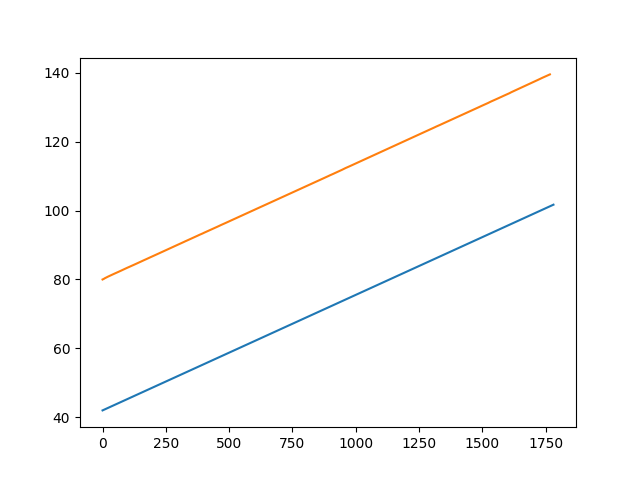

In [12]:
%matplotlib widget



o = theExpe.data['ttl'].getOnsets()
print(theExpe.data['ttl'].ttlIndexes[0]/theExpe.data['OE_LFP'].sampling_rate)
print(theExpe.data['miniscope'].TS_times[0])

print(theExpe.data['ttl'].ttlIndexes[0].shape)
print(theExpe.data['miniscope'].TS_times[0].shape)

if True:
    plt.close()
    plt.plot(theExpe.data['ttl'].times[0])
    plt.plot(theExpe.data['miniscope'].TS_times[0])
    plt.show()

In [ ]:
%matplotlib widget

plt.close()

theExpe.data['webcam'].alignWebcamWithMiniscope()

             ts
0     484970416
1     484185040
2     485397744
3     484970416
4     484185040
...         ...
1957  575482176
1958  575485488
1959  575481072
1960  575484384
1961  575483280

[1962 rows x 1 columns]


c:\Users\Manip7\Documents\GitRepo\HayLabAnalysis\python\mbTools\ePhy\LFP.py:110: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(fTS, dtype=np.int32, parse_dates=True, infer_datetime_format=True, header=None, sep=',', names=['ts'])


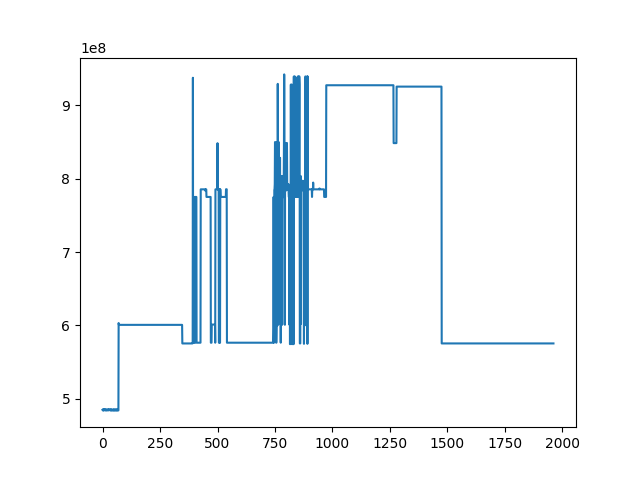

No such comm: 97fb4dee740a491eb27c0b4ae2fc78a8


: 

No such comm: 56cd108fd42d4afda552fd117df4ca97


: 

No such comm: 8aea770a62bc4d41b2aa32351e3ad95c


No such comm: e8382d39b93a409c9f0f230dce775e0f


: 

In [ ]:
%matplotlib widget

plt.close()


df=theExpe.data['OE_LFP'].loadTimeStampsBoard()
print(df)

if True:
    plt.close()
    #plt.plot(theExpe.data['ttl'].ttlIndexes[0]/theExpe.data['OE_LFP'].sampling_rate+theExpe.data['OE_LFP'].start)
    plt.plot(df)
    plt.show()

In [ ]:
hla.tools.find_nearest(theExpe.data['webcam'].times[4],4831.2967)

942

In [32]:
print(theExpe.data['webcam'].times[4][918])

4830.3406758732735


save_all_settings


In [40]:
theExpe.data['webcam'].alignWebcamWithMiniscope()

new array is [  3.40404553   3.43176098   3.46028455 ... 359.26218888 359.29350495
 359.32436862]
first miniscope image ts : 88.6454016
corresponding real time based on ttls 30.795
miniscope onset at webcam image number:  924
realigned times aroud that frame are [30.72385041 30.75231707 30.78109106 30.80925041]
new array is [1207.58335284 1207.60617671 1207.63040053 ... 1562.71988367 1562.7746791
 1562.80938428]
first miniscope image ts : 1288.6540416
corresponding real time based on ttls 1230.71
miniscope onset at webcam image number:  919
realigned times aroud that frame are [1230.64735986 1230.67155471 1230.70791457 1230.73244734]
new array is [2396.97666134 2397.01159533 2397.04761665 ... 2760.63488582 2760.66759495
 2760.70058173]
first miniscope image ts : 2488.7868288
corresponding real time based on ttls 2430.317
miniscope onset at webcam image number:  918
realigned times aroud that frame are [2430.24536162 2430.28078352 2430.31456048 2430.3494387 ]
new array is [3596.51624576

In [ ]:
hla.tools.find_nearest(theExpe.data['webcam'].TS_times[4],4889.1511936)

918